In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('data/salary_data.csv', encoding = 'utf-8')
data

,SoNamKinhNghiem,Luong,NganhNghe
0,7,26.0,KeToan
1,4,13.8,KeToan
2,8,21.5,KeToan
3,9,24.0,KeToan
4,1,7.8,KeToan
...,...,...,...
1421,8,22.8,Sale
1422,6,18.7,Sale
1423,0,7.3,Sale
1424,0,7.2,Sale


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SoNamKinhNghiem  1426 non-null   int64  
 1   Luong            1426 non-null   float64
 2   NganhNghe        1426 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [5]:
data.describe()

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


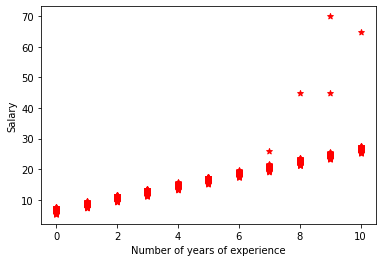

In [6]:
plt.scatter(data.iloc[:,0],data.iloc[:,1], marker='*' , color= 'red')
plt.xlabel("Number of years of experience")
plt.ylabel("Salary")
plt.show()


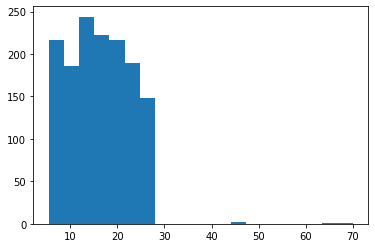

In [7]:
plt.hist(data.iloc[:,1],20)
plt.show()

In [8]:
data.groupby('NganhNghe')['SoNamKinhNghiem'].count()

NganhNghe
HCNS      566
KeToan    472
Sale      388
Name: SoNamKinhNghiem, dtype: int64

In [9]:
data.groupby('NganhNghe')['SoNamKinhNghiem'].mean()

NganhNghe
HCNS      4.998233
KeToan    4.760593
Sale      4.904639
Name: SoNamKinhNghiem, dtype: float64

In [10]:
data.groupby('NganhNghe')['Luong'].mean()

NganhNghe
HCNS      16.556537
KeToan    15.645975
Sale      16.782216
Name: Luong, dtype: float64

In [11]:
data_accountant_salary = data[data['NganhNghe']=='KeToan']
data_accountant_salary

,SoNamKinhNghiem,Luong,NganhNghe
0,7,26.0,KeToan
1,4,13.8,KeToan
2,8,21.5,KeToan
3,9,24.0,KeToan
4,1,7.8,KeToan
...,...,...,...
467,2,10.1,KeToan
468,2,9.7,KeToan
469,10,26.1,KeToan
470,7,20.4,KeToan


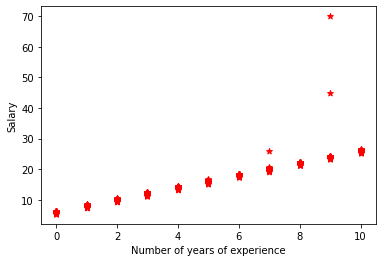

In [12]:
plt.scatter(data_accountant_salary.iloc[:,0],data_accountant_salary.iloc[:,1], marker='*' , color= 'red')
plt.xlabel("Number of years of experience")
plt.ylabel("Salary")
plt.show()

## Build a model to predict salary according to number of years of experience

In [13]:
X=data.iloc[:,0]
y=data.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2, random_state = 0 )
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train.ravel())
print(f'Y={model.intercept_}+{model.coef_[0]}*X')

Y=6.355921152543555+2.0328972924186415*X


## Model evaluation

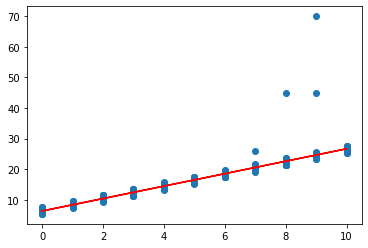

In [14]:
predictions = model.predict(X_train.values.reshape(-1,1))
plt.scatter(X_train,y_train)
plt.plot(X_train,predictions, color = 'red')
plt.show()


In [15]:
y_pred = model.predict(X_test.values.reshape(-1,1))
y_pred

array([10.42171574, 10.42171574, 16.52040761, 24.65199678, 10.42171574,
        6.35592115,  6.35592115, 10.42171574,  6.35592115, 14.48751032,
       10.42171574,  8.38881844, 12.45461303,  8.38881844,  8.38881844,
       12.45461303, 10.42171574, 16.52040761, 16.52040761, 20.5862022 ,
       22.61909949, 12.45461303, 18.55330491, 10.42171574, 16.52040761,
       16.52040761, 20.5862022 , 20.5862022 , 16.52040761, 16.52040761,
       12.45461303, 10.42171574, 26.68489408, 12.45461303,  8.38881844,
        6.35592115, 22.61909949, 24.65199678, 24.65199678,  6.35592115,
       18.55330491, 26.68489408, 24.65199678, 14.48751032, 14.48751032,
       18.55330491, 22.61909949, 14.48751032, 18.55330491, 24.65199678,
       12.45461303, 12.45461303,  8.38881844,  8.38881844, 12.45461303,
       12.45461303, 20.5862022 , 20.5862022 , 18.55330491,  8.38881844,
       16.52040761,  6.35592115, 14.48751032, 12.45461303,  8.38881844,
        8.38881844, 12.45461303, 10.42171574, 14.48751032,  6.35

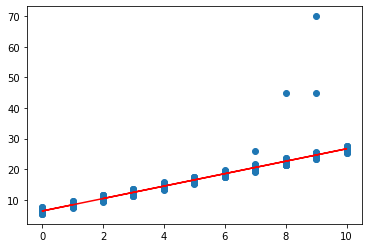

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred, color = 'red')
plt.show()

## Store and use the modul after training

In [17]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename,'wb'))

## Use the saved model

In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
x = [[1],[2],[4]]
y_pred = loaded_model.predict(x)
y_pred

array([ 8.38881844, 10.42171574, 14.48751032])